In [2]:
# Import all necessary python libraries
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
# Read the datasets and get number of rows of each dataset
def read_data():
    for i in range(19):
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('The dataset ' + str(i + 1) + ' contains %d rows.' % len(df))
read_data()

The dataset 1 contains 245576 rows.
The dataset 2 contains 301901 rows.
The dataset 3 contains 245985 rows.
The dataset 4 contains 248239 rows.
The dataset 5 contains 254178 rows.
The dataset 6 contains 224073 rows.
The dataset 7 contains 261959 rows.
The dataset 8 contains 231653 rows.
The dataset 9 contains 248855 rows.
The dataset 10 contains 242709 rows.
The dataset 11 contains 240251 rows.
The dataset 12 contains 254794 rows.
The dataset 13 contains 246190 rows.
The dataset 14 contains 244144 rows.
The dataset 15 contains 241272 rows.
The dataset 16 contains 255201 rows.
The dataset 17 contains 239838 rows.
The dataset 18 contains 229396 rows.
The dataset 19 contains 230628 rows.


In [4]:
# Read and get general information of dataset 5 and the first 5 rows of it
df_5 = pd.read_csv('dataset/dataset_5.txt', sep=',', header=None)
print('The dataset contains %d rows.' % len(df_5))
df_5.head()

The dataset contains 254178 rows.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.071637,-0.104500,0.98682,1.2854,-1.163600,-2.2642,0.018673,-0.66443,0.68869,4.2520,...,-4.4107,-5.93760,2.6961,-0.83067,-0.20180,-0.52616,-40.131,27.299,-10.359,1
1,-0.071637,-0.120530,0.99090,1.6516,-0.797450,-2.2642,0.026527,-0.65231,0.69271,2.0550,...,-3.3122,-4.47290,2.6961,-0.82267,-0.17481,-0.54961,-40.131,27.299,-10.359,1
2,-0.059915,-0.108510,0.99090,2.3839,-0.431280,-2.6304,0.010820,-0.66847,0.67260,0.5903,...,-3.3122,-2.64210,3.0623,-0.83867,-0.19409,-0.55351,-40.131,27.299,-11.824,1
3,-0.056007,-0.100490,0.99498,2.7501,-0.431280,-2.6304,0.010820,-0.67654,0.67662,-1.6067,...,-2.2137,-0.81126,2.6961,-0.83067,-0.19795,-0.54961,-37.202,27.299,-10.359,1
4,-0.067730,-0.092478,0.99498,3.1162,-0.065115,-2.6304,0.002966,-0.67250,0.66456,-3.4375,...,-2.2137,0.65340,2.6961,-0.82267,-0.19409,-0.57305,-37.202,28.764,-10.359,1


In [5]:
# Getting the last 5 rows of dataset 5
df_5.tail()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
254173,-0.95473,0.98971,-0.14452,-96.481,130.29,240.50,0.144330,-3.9560,0.62034,-658.51,...,164.030,314.4600,88.379,-2.0632,0.939400,-1.71000,-34.272,58.057,-209.55,13
254174,-0.99771,1.12200,-0.15677,-95.016,128.46,224.39,0.234650,-5.0828,0.83745,-662.54,...,513.350,731.8900,197.130,-3.7921,-0.487100,-0.24095,-54.778,66.845,-178.80,13
254175,-1.04460,1.27030,-0.16086,-95.382,125.90,206.45,0.305330,-6.4438,1.05050,-662.90,...,491.380,731.8900,-17.443,-4.1682,-0.456260,0.30213,-32.808,-16.640,-158.29,13
254176,-1.08760,1.42660,-0.21395,-98.312,122.97,187.41,0.073648,-7.7847,1.67370,-566.60,...,-68.856,477.4000,-165.740,-3.1558,0.010245,-0.48709,-31.343,-54.722,-134.86,13
254177,-1.11490,1.58690,-0.21395,-104.900,120.77,165.44,-0.888410,-7.7443,1.25560,-210.69,...,-337.260,2.4842,-151.090,-2.2753,0.515300,-0.67072,-50.384,-38.610,-104.10,13


In [6]:
# Getting overall min, mean, max, etc. values of dataset 5
df_5.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,...,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000,254178.000000
mean,-0.609215,0.296369,0.376587,1.221395,1.995649,0.364746,-0.033332,-0.828625,-0.106726,0.494597,...,0.247012,-0.274906,0.609084,-1.126444,0.087232,0.113978,-2.159677,3.821556,-1.567319,7.192707
std,0.544701,0.644044,0.392859,67.576983,37.886099,63.693531,0.164567,0.592303,0.511935,72.024028,...,34.476071,42.696717,28.111713,0.884566,1.085362,0.541106,44.015028,62.072057,151.081813,3.286212
min,-4.819200,-3.423200,-1.933400,-646.830000,-294.830000,-503.550000,-2.706500,-8.422800,-2.511700,-662.900000,...,-669.730000,-620.730000,-701.810000,-8.086100,-7.989700,-6.836000,-652.360000,-819.280000,-685.570000,1.000000
25%,-0.872670,-0.064421,0.084199,-16.657000,-10.684000,-11.418000,-0.103060,-0.979450,-0.509450,-10.395000,...,-11.368000,-6.669900,-8.655000,-1.402900,-0.197950,-0.026064,-6.443600,-7.852500,-17.682000,5.000000
50%,-0.685110,0.051814,0.312920,0.186890,-0.065115,0.298940,-0.028448,-0.854250,-0.075224,0.590300,...,0.715580,-0.445090,0.499110,-1.010800,-0.020598,0.110680,0.879720,0.935530,-0.106480,7.000000
75%,-0.313900,0.564850,0.729510,13.735000,12.018000,12.016000,0.034380,-0.628080,0.234360,13.040000,...,13.165000,6.512100,7.456300,-0.810660,0.199160,0.270870,6.738400,14.118000,36.510000,10.000000
max,1.901600,5.158100,8.542700,736.550000,315.200000,459.470000,1.365600,3.669100,4.592700,732.190000,...,734.150000,733.350000,337.010000,8.169600,7.721100,8.127900,432.960000,425.690000,713.190000,13.000000


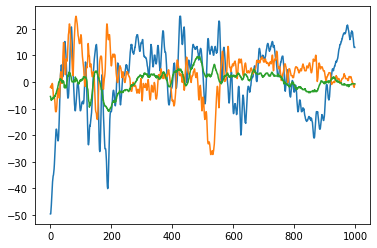

In [7]:
# Getting values of the activity standing and 
# construct a plot for gyroscope axes G1, G2, G3 
# that are placed on chest in the time period [500, 1500]
def standing():
    df_standing = df_5[df_5[24] == 3].values
    plt.plot(df_standing[500:1500, 9:12])
    plt.show()
standing()

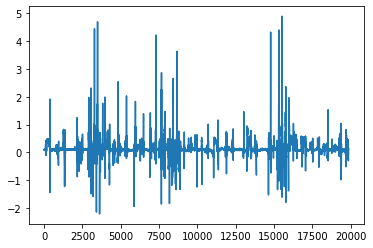

In [8]:
# Getting values of the activity sweeping and 
# construct a plot for accelerometer axis A3 
# placed on ankle numbered as 20 in all time period
def sweeping():
    df_sweeping = df_5[df_5[24] == 6].values
    plt.plot(df_sweeping[:, 20])
    plt.show()
sweeping()

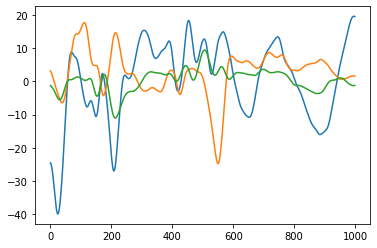

In [9]:
# Remove unwanted noise 
def noise_removing():
    # Using Butterworth technique and low pass filter with analog set to False
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    # Reading the desired dataset that we want to apply signal filtering to
    df_5 = pd.read_csv('dataset/dataset_5.txt', sep=',', header=None)
    # Getting the values of desired activity, say, standing activity
    df_standing = df_5[df_5[24] == 3].values
    # Apply signal filtering to each of the 3 gyroscope axes G1, G2, G3 placed on chest
    # for satnding numbered as from 9 to 12 (exclusive)
    for i in range(9,12):
            df_standing[:,i] = signal.lfilter(b, a, df_standing[:, i])
    # Construct a plot of it in time period [500, 1500]
    plt.plot(df_standing[500:1500, 9:12])
    plt.show()
noise_removing()

In [15]:
def feature_engineering():
    # Create an array for training and testing of shape 0 rows and 10 columns
    training = np.empty(shape=(0, 10))
    testing = np.empty(shape=(0, 10))
    # deal with each dataset file
    for i in range(19):
        # Reading each dataset of 19 people
        df = pd.read_csv('dataset/dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        for c in range(1, 14):
            # Getting the data of each activity of each dataset
            activity_data = df[df[24] == c].values
            # Using Butterworth technique with low pass filter and analog set to False
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            # Apply signal filtering to each of the axes of each activity data
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            # Getting the length (amount) of each activity data
            datat_len = len(activity_data)
            # Taking 80% of data for training and leaving 20% for testing
            training_len = math.floor(datat_len * 0.8)
            # Set the training and testing data as specified before
            training_data = activity_data[:training_len, :]
            testing_data = activity_data[training_len:, :]

            # Data segementation: for time series data, we need to segment the whole time series, and then extract features from each period of time
            # to represent the raw data. In this one, we define each period of time contains 1000 data points. Each period of time contains 
            # different data points.
            training_sample_number = training_len // 1000 + 1
            testing_sample_number = (datat_len - training_len) // 1000 + 1
            # Create sample data for training
            for s in range(training_sample_number):
                if s < training_sample_number - 1:
                    sample_data = training_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = training_data[1000*s:, :]
                # Three gyroscope data in hip sensor (ranging from 15 to 18 (exclusive)) is used to extract three simple features: min, median and max value in
                # a period of time. Finally we get 9 features and 1 label to construct feature dataset. 

                feature_sample = []
                for i in range(15,18):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.median(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                # Construct feature sample for training    
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                training = np.concatenate((training, feature_sample), axis=0)
            # Do the same as training for testing
            for s in range(testing_sample_number):
                if s < training_sample_number - 1:
                    sample_data = testing_data[1000*s:1000*(s + 1), :]
                else:
                    sample_data = testing_data[1000*s:, :]

                feature_sample = []
                for i in range(15,18):
                    feature_sample.append(np.min(sample_data[:, i]))
                    feature_sample.append(np.median(sample_data[:, i]))
                    feature_sample.append(np.max(sample_data[:, i]))
                feature_sample.append(sample_data[0, -1])
                feature_sample = np.array([feature_sample])
                testing = np.concatenate((testing, feature_sample), axis=0)
    # 'Frame' (Create) the data for training and testing after having done all the above steps
    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    # Produce CSV files for training and testing and save in the same repository
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)
    print(feature_sample)
feature_engineering()

deal with dataset 1
deal with dataset 2
deal with dataset 3
deal with dataset 4
deal with dataset 5
deal with dataset 6
deal with dataset 7
deal with dataset 8
deal with dataset 9
deal with dataset 10
deal with dataset 11
deal with dataset 12
deal with dataset 13
deal with dataset 14
deal with dataset 15
deal with dataset 16
deal with dataset 17
deal with dataset 18
deal with dataset 19
[[-22.3324875  -10.2155918    7.60346834 -33.50633835 -16.99703067
    0.85798979 -16.86956874 -15.96343947 -13.17635695  13.        ]]


In [16]:
def model_training_and_evaluation():
    # Read training and testing data
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)
    
    # Get the number of each activity (the last column in the dataset)
    y_train = df_training[df_training.shape[1] - 1].values
    # Labels should start from 0 in sklearn
    y_train = y_train - 1
    # Change the type to integer
    y_train = y_train.astype(int)
    # Drop the last column in the dataset
    df_training = df_training.drop([df_training.shape[1] - 1], axis=1)
    # Get values for model training
    X_train = df_training.values
    print ("training input done ")
    
    # Do the same as training for testing
    y_test = df_testing[df_testing.shape[1] - 1].values
    y_test = y_test - 1
    y_test = y_test.astype(int)
    df_testing = df_testing.drop([df_testing.shape[1] - 1], axis=1)
    X_test = df_testing.values
    print ("testing input done")

    # Feature normalization for improving the performance of machine learning models. In this code, 
    # StandardScaler is used to scale original feature to be centered around zero. 
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    print ("feature normlization done")

    # Build KNN classifier, in this code
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Evaluation. when we train a machine learning model on training set, we should evaluate its performance on testing set.
    # We could evaluate the model by different metrics. Firstly, we could calculate the classification accuracy.
    # In this code, when n_neighbors is set to 3, the accuracy achieves 0.705.
    y_pred = knn.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    # We could use confusion matrix to view the classification for each activity.
    print(confusion_matrix(y_test, y_pred))


    # Build KNN classifier, in this example code
    # Get tuned parameters for searching
    tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
    acc_scorer = make_scorer(accuracy_score)
    # Using GridSearch to search for optimal KNN classifier based on tuned parameters and accuracy score
    grid_obj  = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10, scoring=acc_scorer)
    # Fit the model for training
    grid_obj  = grid_obj .fit(X_train, y_train)
    # Get best classifier
    clf = grid_obj.best_estimator_
    print ("some results")
    print('best clf:', clf)
    # Fit the classifier model
    clf.fit(X_train, y_train)
    # Create predited class
    y_pred = clf.predict(X_test)
    print(y_pred)
    print(y_pred.shape, y_test.shape)
    # Print out accuracy score and confusion matrix. The accuracy for optimal KNN classifier is 0.693
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Another machine learning model: svm. In this code, we use gridsearch to find the optimial classifier
    # It will take a long time to find the optimal classifier.
    # the accuracy for SVM classifier with default parameters is 0.635, 
    # which is worse than KNN. The reason may be parameters of svm classifier are not optimal.  
    # Another reason may be we only use 9 features and they are not enough to build a good svm classifier. 
    
    # Do the same as training for testing 
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                    'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
model_training_and_evaluation()

training input done 
testing input done
feature normlization done
Accuracy:  0.7053742802303263
[[ 38  14   1   3   0   0   0   0   0   0   0   1   0]
 [ 15  35   2   3   1   1   0   0   0   0   0   0   0]
 [ 14  10  15  13   0   1   0   0   0   0   1   3   0]
 [  8   3   5  76   1   0   1   0   0   0   4   1   0]
 [  0   0   0   1  23  14   8   3   3   0   3   1   1]
 [  0   0   1   5  14  27  16   7   2   0   4   9   0]
 [  1   0   1   0  10   4 195   0   0   3   0   4   1]
 [  0   0   0   0   3   3   6  25   0   1   1   0   0]
 [  0   0   0   0   4   4   1   0  28   1   0   0   0]
 [  0   0   0   0   0   0   0   0   1  95   0   0   0]
 [  0   1   2   0   1   3   2   0   0   0  78  13   0]
 [  0   0   1   3   1   1   3   0   0   0  18  73   0]
 [  0   0   0   0   3   1   2   0   0   4   0   1  27]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


some results
best clf: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
[ 0  1  0 ... 12  6  5]
(1042,) (1042,)
Accuracy:  0.6928982725527831
[[ 36  10   6   4   0   0   0   0   0   0   0   1   0]
 [ 18  32   2   3   1   1   0   0   0   0   0   0   0]
 [ 15  10  13  15   0   1   0   0   0   0   1   2   0]
 [  5   2   7  79   1   1   1   0   0   0   3   0   0]
 [  0   0   1   2  15  15   9   5   4   0   4   1   1]
 [  0   0   1   3  19  21  19   7   2   0   5   8   0]
 [  0   0   0   2   8   0 198   3   0   3   0   5   0]
 [  0   0   0   0   1   2   8  26   0   1   1   0   0]
 [  0   0   0   0   2   4   3   1  27   1   0   0   0]
 [  0   0   0   0   0   0   1   0   1  94   0   0   0]
 [  1   0   0   0   0   4   1   0   0   0  83  11   0]
 [  0   0   0   0   0   0   4   0   0   0  23  73   0]
 [  0   0   0   0   0   3   2   0   0   7   0   1  25]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best clf: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy:  0.6353166986564299
[[  5  47   0   4   0   0   0   0   0   0   0   1   0]
 [  0  50   0   4   1   0   0   0   0   0   1   1   0]
 [  0  33   1  19   0   1   0   0   0   0   3   0   0]
 [  7   5   0  78   3   0   1   0   0   0   5   0   0]
 [  0   0   0   3  16  16  13   2   3   0   2   2   0]
 [  0   0   2   2  16  35  12   5   3   0   7   3   0]
 [  0   0   0   0   3   7 196   3   0   7   0   3   0]
 [  0   1   0   0   0   2   5  30   0   0   0   1   0]
 [  0   0   0   0   3   6   2   0  26   1   0   0   0]
 [  0   0   0   0   0   0   0   0   1  92   0   0   3]
 [  0   1   0   4   0   3   2   0   0   0  69  21   0]
 [  0   1   0   4   0   1   4   0   1   0  48  41   0]
 [  0   0   0   0   0   2   9   0   0   4   0   0  23]]
